In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif
from string import ascii_letters
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KDTree
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier

In [33]:
df = pd.read_csv('car_price_prediction.csv', encoding='utf-8')
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [34]:
df.drop(columns=['ID', 'Manufacturer', 'Model', 'Prod. year', 'Category', 'Color', 'Gear box type'], inplace=True)
df

,Price,Levy,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Drive wheels,Doors,Wheel,Airbags
0,13328,1399,Yes,Hybrid,3.5,186005 km,6.0,4x4,04-May,Left wheel,12
1,16621,1018,No,Petrol,3,192000 km,6.0,4x4,04-May,Left wheel,8
2,8467,-,No,Petrol,1.3,200000 km,4.0,Front,04-May,Right-hand drive,2
3,3607,862,Yes,Hybrid,2.5,168966 km,4.0,4x4,04-May,Left wheel,0
4,11726,446,Yes,Petrol,1.3,91901 km,4.0,Front,04-May,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,Yes,CNG,2.0 Turbo,300000 km,4.0,Rear,02-Mar,Left wheel,5
19233,15681,831,Yes,Petrol,2.4,161600 km,4.0,Front,04-May,Left wheel,8
19234,26108,836,Yes,Diesel,2,116365 km,4.0,Front,04-May,Left wheel,4
19235,5331,1288,Yes,Diesel,2,51258 km,4.0,Front,04-May,Left wheel,4


In [35]:
df.columns

Index(['Price', 'Levy', 'Leather interior', 'Fuel type', 'Engine volume',
       'Mileage', 'Cylinders', 'Drive wheels', 'Doors', 'Wheel', 'Airbags'],
      dtype='object')

In [36]:
df.rename(columns={'Price': 'price',
                   'Levy': 'levy',
                   'Leather interior': 'leather_interior',
                   'Fuel type': 'fuel_type',
                   'Engine volume': 'engine_volume',
                   'Mileage': 'mileage',
                   'Cylinders': 'cylinders',
                   'Drive wheels': 'drive_wheels',
                   'Doors': 'doors',
                   'Wheel': 'wheel',
                   'Airbags': 'airbags'
                  }, inplace=True)
df

,price,levy,leather_interior,fuel_type,engine_volume,mileage,cylinders,drive_wheels,doors,wheel,airbags
0,13328,1399,Yes,Hybrid,3.5,186005 km,6.0,4x4,04-May,Left wheel,12
1,16621,1018,No,Petrol,3,192000 km,6.0,4x4,04-May,Left wheel,8
2,8467,-,No,Petrol,1.3,200000 km,4.0,Front,04-May,Right-hand drive,2
3,3607,862,Yes,Hybrid,2.5,168966 km,4.0,4x4,04-May,Left wheel,0
4,11726,446,Yes,Petrol,1.3,91901 km,4.0,Front,04-May,Left wheel,4
...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,-,Yes,CNG,2.0 Turbo,300000 km,4.0,Rear,02-Mar,Left wheel,5
19233,15681,831,Yes,Petrol,2.4,161600 km,4.0,Front,04-May,Left wheel,8
19234,26108,836,Yes,Diesel,2,116365 km,4.0,Front,04-May,Left wheel,4
19235,5331,1288,Yes,Diesel,2,51258 km,4.0,Front,04-May,Left wheel,4


In [37]:
# cleaning up the data

df.price = df.price.astype(int)

#cleaning up levy column
df.levy.replace('-', 0, inplace=True) #impute zeros because it makes sense here
df.levy = df.levy.astype(int)

#cleaning leather_interior column 
df.leather_interior = np.where(df["leather_interior"] == "No", 0, 1)

#cleaning up fuel_type column
df = df[df['fuel_type'] != 'CNG'] 
df = df[df['fuel_type'] != 'Diesel']
df['fuel_type'] = np.where(df['fuel_type'] == 'Hybrid', 0, 1)

#cleaning up engine_volume

df = df[~df.engine_volume.str.contains('Turbo')]
df.engine_volume = df.engine_volume.astype(float) #making sure it is a float for regression

#cleaning up mileage column
df["mileage"] = [x.replace("km", "") for x in df.mileage]
df["mileage"] = [x.strip() for x in df.mileage]
df.mileage = df.mileage.astype(int)
df.mileage = [x * 0.621371 for x in df.mileage] #converting each value from km to miles

#cleaning drive wheels
df = df[df['drive_wheels'] != 'Rear']
df['drive_wheels'] = np.where(df['drive_wheels'] == "Front", 0, 1) #0 if front wheel drive, 1 if 4x4

#cleaning doors
df = df[df['doors'] != '>5']
df.doors = np.where(df.doors == "04-May", 0, 1) #0 if 04-may, 1 if 02-mar

#cleaning fuel_type 
df.fuel_type.map(dict(Hybrid=1, Petrol=0))

#cleaning wheel column
df["wheel"] = np.where(df["wheel"] == "Left wheel", 0, 1)

In [38]:
df

,price,levy,leather_interior,fuel_type,engine_volume,mileage,cylinders,drive_wheels,doors,wheel,airbags
0,13328,1399,1,0,3.5,115578.112855,6.0,1,0,0,12
1,16621,1018,0,1,3.0,119303.232000,6.0,1,0,0,8
2,8467,0,0,1,1.3,124274.200000,4.0,0,0,1,2
3,3607,862,1,0,2.5,104990.572386,4.0,1,0,0,0
4,11726,446,1,1,1.3,57104.616271,4.0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...
19224,19130,0,1,1,2.4,22245.081800,4.0,0,0,0,12
19229,50,0,0,0,1.5,93205.650000,4.0,0,0,0,6
19230,470,645,1,0,1.8,190962.842575,4.0,0,0,0,12
19233,15681,831,1,1,2.4,100413.553600,4.0,0,0,0,8


In [39]:
df.isnull().sum() #checking for missing values

price               0
levy                0
leather_interior    0
fuel_type           0
engine_volume       0
mileage             0
cylinders           0
drive_wheels        0
doors               0
wheel               0
airbags             0
dtype: int64

In [40]:
df.describe()
#Mean of Price 14349.135636

,price,levy,leather_interior,fuel_type,engine_volume,mileage,cylinders,drive_wheels,doors,wheel,airbags
count,12364.000000,12364.00000,12364.000000,12364.000000,12364.000000,1.236400e+04,12364.000000,12364.000000,12364.000000,12364.000000,12364.000000
mean,14349.135636,646.01472,0.706891,0.716354,2.222226,5.477066e+05,4.464898,0.221288,0.021999,0.095277,6.713847
std,17096.248118,535.14292,0.455206,0.450785,0.886050,2.279357e+07,1.127687,0.415131,0.146687,0.293608,4.459744
min,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,3450.000000,0.00000,0.000000,0.000000,1.600000,4.374452e+04,4.000000,0.000000,0.000000,0.000000,4.000000
50%,11563.000000,642.00000,1.000000,1.000000,2.000000,7.767138e+04,4.000000,0.000000,0.000000,0.000000,6.000000
75%,18817.000000,891.00000,1.000000,1.000000,2.500000,1.155781e+05,4.000000,0.000000,0.000000,0.000000,12.000000
max,872946.000000,7063.00000,1.000000,1.000000,20.000000,1.334384e+09,16.000000,1.000000,1.000000,1.000000,16.000000


array([[<AxesSubplot:title={'center':'price'}>]], dtype=object)

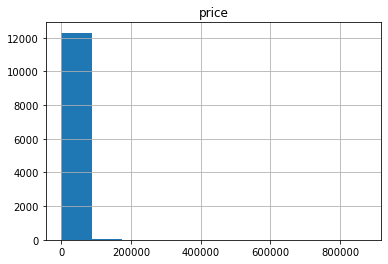

In [41]:
df.hist(column = 'price')
#Model is skewed to the right

In [42]:
 df['log_price'] = np.log(df['price'])
    

array([[<AxesSubplot:title={'center':'log_price'}>]], dtype=object)

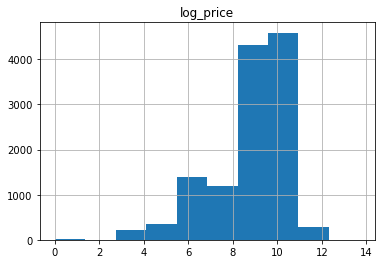

In [43]:
df.hist(column = 'log_price')

In [44]:
df.corr()
# 0 - .3 -- weak correlation
# .3 - .6 -- moderate correlation
# .6 - 1 -- strong correlation
# ANYTHING >.5 inidicates a sign of multicollinearity

#Multicollinear pairs:
#log_price and price (0.64072)
#cylinders and engine_volume (0.780368)
#driver_wheels and engine_volume (0.574739)
#driver_wheels and cylinders (0.579523)

,price,levy,leather_interior,fuel_type,engine_volume,mileage,cylinders,drive_wheels,doors,wheel,airbags,log_price
price,1.000000,0.078512,0.037047,0.135333,0.158723,-0.007302,0.124579,0.078838,-0.031284,-0.106159,-0.055168,0.640720
levy,0.078512,1.000000,0.346445,0.086019,0.489713,-0.024217,0.356326,0.252385,-0.117648,-0.180057,0.105555,-0.047310
leather_interior,0.037047,0.346445,1.000000,0.020130,0.276499,-0.030831,0.195514,0.103990,-0.108144,-0.396840,0.119729,-0.105869
fuel_type,0.135333,0.086019,0.020130,1.000000,0.101143,0.006906,0.112241,0.143094,0.087036,0.026361,-0.150216,0.163364
engine_volume,0.158723,0.489713,0.276499,0.101143,1.000000,-0.010216,0.780368,0.574739,-0.059026,-0.223329,0.164856,-0.009776
mileage,-0.007302,-0.024217,-0.030831,0.006906,-0.010216,1.000000,-0.007951,0.001115,-0.002893,0.010028,-0.007998,-0.004353
cylinders,0.124579,0.356326,0.195514,0.112241,0.780368,-0.007951,1.000000,0.579523,-0.018803,-0.113024,0.065842,-0.027464
drive_wheels,0.078838,0.252385,0.103990,0.143094,0.574739,0.001115,0.579523,1.000000,0.028970,-0.042921,0.020618,-0.046540
doors,-0.031284,-0.117648,-0.108144,0.087036,-0.059026,-0.002893,-0.018803,0.028970,1.000000,0.030209,-0.059123,0.008090
wheel,-0.106159,-0.180057,-0.396840,0.026361,-0.223329,0.010028,-0.113024,-0.042921,0.030209,1.000000,-0.179198,-0.056543


In [45]:
print(df.columns)

Index(['price', 'levy', 'leather_interior', 'fuel_type', 'engine_volume',
       'mileage', 'cylinders', 'drive_wheels', 'doors', 'wheel', 'airbags',
       'log_price'],
      dtype='object')


In [46]:
y = df['log_price']
X = df[['levy', 'leather_interior', 'fuel_type', 'engine_volume','mileage', 'cylinders', 'drive_wheels', 'doors', 'wheel', 'airbags']]
#X = sm.add_constant(X)
model1 = sm.OLS(y, X).fit()
print(model1.summary())
#We have a variance of 93.2% according to the R-squared which is very good
# For example, on average, for a one-unit increase in cylinders, the helpfulness score will increase by 1.6302.
# The magnitude of the effect is very large


                                 OLS Regression Results                                
Dep. Variable:              log_price   R-squared (uncentered):                   0.932
Model:                            OLS   Adj. R-squared (uncentered):              0.932
Method:                 Least Squares   F-statistic:                          1.695e+04
Date:                Fri, 09 Dec 2022   Prob (F-statistic):                        0.00
Time:                        12:12:04   Log-Likelihood:                         -28005.
No. Observations:               12364   AIC:                                  5.603e+04
Df Residuals:                   12354   BIC:                                  5.611e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                       coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [47]:
# ML Models

In [48]:
df.hist(column = 'mileage')
#Mileage is skewed to the right

In [50]:
 df['log_mileage'] = np.log1p(df['mileage'])

array([[<AxesSubplot:title={'center':'log_mileage'}>]], dtype=object)

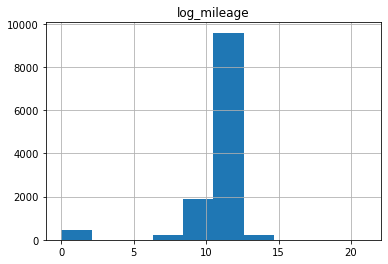

In [51]:
df.hist(column = 'log_mileage')

In [53]:
df['log_mileage'].mean()

10.711409983919632

In [52]:
# Baseline Linear Regression model
y = df['log_mileage']
X = df[['levy', 'leather_interior', 'fuel_type', 'engine_volume', 'price', 'cylinders', 'drive_wheels', 'doors', 'wheel', 'airbags']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

model2 = LinearRegression() 
model2.fit(X_train, y_train)
y_pred = model2.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 2.213682047132607


In [22]:
# 10% of the mean for the variable log_mileage is equal to 1.0711.
# RMSE of 2.2136 is greater than 10% of the mean for log_mileage --> the model is inaccurate.

In [54]:
# KNN Regressor
y = df['log_mileage']
X = df[['levy', 'leather_interior', 'fuel_type', 'engine_volume', 'price', 'cylinders', 'drive_wheels', 'doors', 'wheel', 'airbags']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

model3 = KNeighborsRegressor(n_neighbors = 5) 

model3.fit(X_train, y_train)
y_pred = model3.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 2.0899986908268797


In [55]:
#Model is improved but still inaccurate

In [56]:
k_range = range(2, 22)

scores = []


for k in k_range:
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_val)
    scores.append(np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

print(scores)

[2.2188890870673625, 2.1225105362899845, 2.1088248881102825, 2.0899986908268797, 2.0753031173185064, 2.0836321934501028, 2.0830312350995817, 2.0761676015963264, 2.0758093824718253, 2.081753095231804, 2.0869257323103123, 2.10255933308355, 2.10590469857119, 2.1052960950103743, 2.09982134505465, 2.10386403883143, 2.105794948800239, 2.1096412651181646, 2.10404916055167, 2.1011404616277254]


Text(0, 0.5, 'Testing Accuracy (RMSE)')

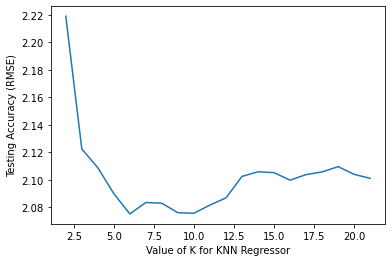

In [57]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN Regressor')
plt.ylabel('Testing Accuracy (RMSE)') 

In [58]:
# KNN Regressor with n_neighbors = 6
y = df['log_mileage']
X = df[['levy', 'leather_interior', 'fuel_type', 'engine_volume', 'price', 'cylinders', 'drive_wheels', 'doors', 'wheel', 'airbags']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler() 
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

model4 = KNeighborsRegressor(n_neighbors = 6) 

model4.fit(X_train, y_train)
y_pred = model4.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 2.0753031173185064


In [59]:
# Random Forst Regression model

y = df['log_mileage']
X = df[['levy', 'leather_interior', 'fuel_type', 'engine_volume', 'price', 'cylinders', 'drive_wheels', 'doors', 'wheel', 'airbags']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

model5 = RandomForestRegressor(random_state = 0)
model5.fit(X_train, y_train)
y_pred = model5.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 1.9663612202647045


In [60]:
#Grid Search for best parameters

y = df['log_mileage']
X = df[['levy', 'leather_interior', 'fuel_type', 'engine_volume', 'price', 'cylinders', 'drive_wheels', 'doors', 'wheel', 'airbags']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

param_grid = [{'n_estimators': [10, 50, 100, 200, 300], 'max_depth': [2, 4, 6, 8, 10, 12, 14, 16], 'max_features': [2, 4, 6, 7, 8, 9, 10]}]

rf = RandomForestRegressor(random_state = 0) # Add random_state to the instance, too

grid_search = GridSearchCV(rf, param_grid, cv=3)

grid_search.fit(X_train, y_train)

grid_search.best_params_

{'max_depth': 16, 'max_features': 4, 'n_estimators': 300}

In [61]:
# Random Forst Regression model with "best" parameters

y = df['log_mileage']
X = df[['levy', 'leather_interior', 'fuel_type', 'engine_volume', 'price', 'cylinders', 'drive_wheels', 'doors', 'wheel', 'airbags']]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=0)

scaler = StandardScaler() 
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)

model6 = RandomForestRegressor(max_depth = 16, max_features = 4, n_estimators = 300, random_state = 0)
model6.fit(X_train, y_train)
y_pred = model6.predict(X_val)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_val, y_pred)))

Root Mean Squared Error: 1.8614964162791732
